<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Use-boxpot-to-investigate-outliers" data-toc-modified-id="Use-boxpot-to-investigate-outliers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Use boxpot to investigate outliers</a></span></li><li><span><a href="#Investigate-outliers-for-&quot;fare&quot;" data-toc-modified-id="Investigate-outliers-for-&quot;fare&quot;-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Investigate outliers for "fare"</a></span></li><li><span><a href="#Let's-investigate-outliers-by-each-class." data-toc-modified-id="Let's-investigate-outliers-by-each-class.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Let's investigate outliers by each class.</a></span></li></ul></div>

# Outlier Detection

In this activity, we apply different methods to detect outliers in data. 

We use the same example of Titanic passengers dataset. 

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('data/titanic passenger list.csv') 
# Reading the dataset into a dataframe using Pandas
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Use boxpot to investigate outliers

In this task, please use boxplot (boxes and whiskers plot) from matplotlib to investigate possible data outliers.

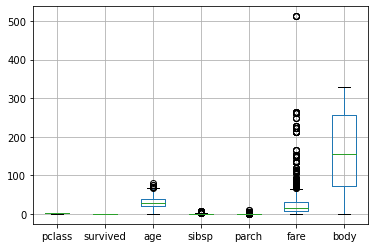

In [2]:
# We can boxplot an entire DataFrame, quick & nasty, ignores non-numeric data too
import matplotlib.pyplot as plt
%matplotlib inline

bp = df1.boxplot()

The first thing to notice is that 'fare' has many outliers.

However, plotting all data together might not be right because of teh different ranges of attributes. Therefore, we look at one attribute at a time instead. 

## Investigate outliers for "fare"

It seems that there are many extreme values for "fare". in this task  

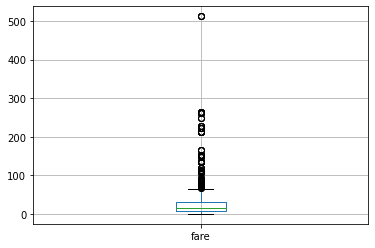

In [5]:
bp = df1.boxplot(column='fare')
# Sometimes you have to force display of outliers:
#bp = plt.boxplot(df1.fare, 0, 'ro') # red circle

In [6]:
# We can see a bunch of fares above 200, then something around 500, look at the outliers:
df1[df1['fare'] > 400] 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN


In [7]:
# fare of 512.3292 looks very high compared to other, that's a weird value too, did they split the cost?
# or was it just the one ticket?
512.3292 * 4

2049.3168

It is still a weird value, what's 0.3292 or 0.3168 of a pound? Neither make sense in old currency (pounds, shillings and pence) e.g. £512.32s.92d because...

There were twenty (20) shillings per pound and the shilling was divided into twelve (12) pennies.(so 32s = £1.12s and 92 pennies is... carry the 4... heaps)
Maybe someone converted to dollars?? Adjusted for inflation?
Hard to say if these are 'bad' outliers, class is 1st, they have 4 cabins, maybe they're just big spenders in a reasonable trawl of the internet most posts just ignore this e.g. "There were 4 people who paid the most expensive ticket that cost £512.3292"

Mrs James Warburton Martinez Cardeza (Charlotte Wardle Drake), 58, from Germantown, PA, 
boarded the Titanic at Cherbourg with her son Thomas and her maid Anna Ward. 
They occupied suite B-51/53/55 (ticket number17755, £512, 6s).
http://www.encyclopedia-titanica.org/titanic-survivor/charlotte-cardeza.html
"with his mother Charlotte Cardeza and his manservant Gustave Lesueur"
    
Anna: "She worked as personal maid and companion to Mrs Charlotte Cardeza." 

In [8]:
# so how do you get 512.3292 from £512, 6s
# 6shillings is ~1/3 pound?
# 6/20 is 0.3 so that may explain the 0.3292..
def poundit(p,s,d):
    return p + (d / 12.0 + s) / 20
# force the 12.0 not the 20!
# There were 20 shillings per pound and the shilling was divided into 12 pennies.

In [9]:
poundit(512,6,0) # £512, 6s

512.3

So 512.3 is a real value.

## Let's investigate outliers by each class.

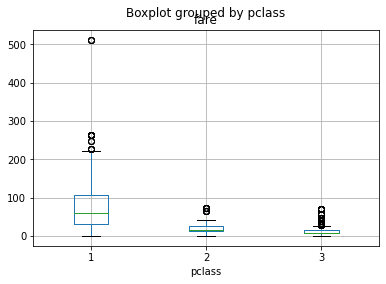

In [10]:
# plot by class
bp = df1.boxplot(column='fare', by = 'pclass')